In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
%matplotlib inline

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12662955739611081870
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3155650150
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3065885724978614958
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
incidents = pd.read_csv("Data/Processed_incidents.csv")
incidents = incidents.loc[:, ~incidents.columns.str.contains('^Unnamed')]

In [3]:
incidents.Date= pd.to_datetime(incidents.Date)

In [4]:
incidents["Day"] = incidents.Date.dt.day
incidents["Month"] = incidents.Date.dt.month

In [5]:
incidents = incidents.drop(["Date"], axis=1)

In [6]:
incidents = incidents.drop(["IncidntNum", "Descript", "Address","X", "Y", 
                             "Resolution", "Location", "Current Supervisor Districts",
                             "PdId", "Current Police Districts",
                             "Analysis Neighborhoods", "SF Find Neighborhoods"],
                           axis=1)

In [7]:
incidents.head(10)

,Category,DayOfWeek,Time,PdDistrict,Day,Month
0,VEHICLE THEFT,Tuesday,10:30,SOUTHERN,15,5
1,NON-CRIMINAL,Tuesday,04:14,SOUTHERN,15,5
2,OTHER OFFENSES,Tuesday,02:01,MISSION,15,5
3,OTHER OFFENSES,Tuesday,02:01,MISSION,15,5
4,OTHER OFFENSES,Tuesday,02:01,MISSION,15,5
5,OTHER OFFENSES,Tuesday,01:27,MISSION,15,5
6,ROBBERY,Tuesday,01:25,SOUTHERN,15,5
7,DRUG/NARCOTIC,Tuesday,01:25,SOUTHERN,15,5
8,LIQUOR LAWS,Tuesday,00:19,PARK,15,5
9,WARRANTS,Tuesday,00:19,PARK,15,5


In [8]:
district_count = pd.DataFrame(incidents.groupby([ 'Category']).count()).reset_index() 
district_count.head(n=10)

,Category,DayOfWeek,Time,PdDistrict,Day,Month
0,ARSON,3931,3931,3931,3931,3931
1,ASSAULT,194694,194694,194694,194694,194694
2,BAD CHECKS,925,925,925,925,925
3,BRIBERY,813,813,813,813,813
4,BURGLARY,91543,91543,91543,91543,91543
5,DISORDERLY CONDUCT,10040,10040,10040,10040,10040
6,DRIVING UNDER THE INFLUENCE,5672,5672,5672,5672,5672
7,DRUG/NARCOTIC,119628,119628,119628,119628,119628
8,DRUNKENNESS,9826,9826,9826,9826,9826
9,EMBEZZLEMENT,2988,2988,2988,2988,2988


C:\Users\nthan\.conda\envs\Crime_Prediction_SF\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


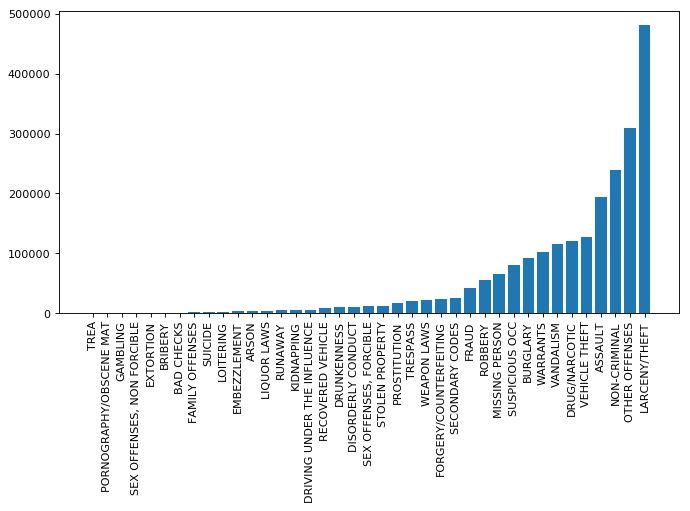

In [9]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
district_count = district_count.sort_values("DayOfWeek")
plt.bar(district_count["Category"], district_count["DayOfWeek"])
plt.xticks(rotation = 90, )
fig.show()

C:\Users\nthan\.conda\envs\Crime_Prediction_SF\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


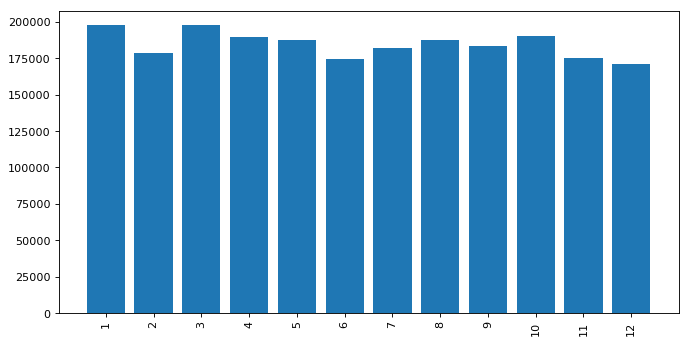

In [10]:
monthly_count = pd.DataFrame(incidents.groupby(['Month']).count()).reset_index() 
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
monthly_count = monthly_count.sort_values("DayOfWeek")
plt.bar(monthly_count["Month"], monthly_count["DayOfWeek"])
plt.xticks(monthly_count["Month"], rotation = 90, )
fig.show()

In [11]:
train, test = train_test_split(incidents, test_size = 0.2)

In [12]:
train_target = train.pop("Category")
test_target = test.pop("Category")

In [13]:
train_target_nodumm = train_target
test_target_nodumm = test_target
train_target = pd.get_dummies(train_target)
test_target = pd.get_dummies(test_target)

In [14]:
train = train.join(pd.get_dummies(train["DayOfWeek"]))
test = test.join(pd.get_dummies(test["DayOfWeek"]))
train = train.drop(["DayOfWeek"], axis = 1)
test = test.drop(["DayOfWeek"], axis = 1)

train['Time'] = [int(inc[:2])*60 + int(inc[3:]) for inc in train['Time']]

test['Time'] = [int(inc[:2])*60 + int(inc[3:]) for inc in test['Time']]

train = train.join(pd.get_dummies(train["PdDistrict"]))
test = test.join(pd.get_dummies(test["PdDistrict"]))
train = train.drop(["PdDistrict"], axis = 1)
test = test.drop(["PdDistrict"], axis = 1)

In [15]:
train.head(10)

,Time,Day,Month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
814810,1020,23,12,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1167701,1260,21,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
836587,870,29,10,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1641328,840,20,12,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
99309,1320,27,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1842654,1315,10,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
483530,1099,27,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1892020,731,7,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
921007,1380,24,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1355353,720,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer

sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)

norm = Normalizer()
train = norm.fit_transform(train)
test = norm.fit_transform(test)


In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
train_target_onehot = enc.fit_transform(train_target_nodumm.values.reshape(-1,1)).toarray()
test_target_onehot = enc.transform(test_target_nodumm.values.reshape(-1,1)).toarray()

In [21]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
clrtree = DecisionTreeClassifier()
clrtree.fit(train, train_target_onehot)

clrk = KNeighborsClassifier(n_jobs = -1)
clrk.fit(train, train_target_onehot)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
from sklearn.metrics import log_loss

print(log_loss(test_target_onehot, clrtree.predict(test)))
print(log_loss(test_target_onehot, clrk.predict(test)))

20.19989257230048
7.852845366755355


In [29]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dropout, Dense, Reshape

In [40]:
import numpy as np
model_m = Sequential()
model_m.add(Dense(100, activation = "softmax", input_shape=(20,1)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(39, activation='softmax'))
print(model_m.summary())

model_m.compile(
 optimizer = "adam",
 loss = "categorical_crossentropy",
 metrics = ["categorical_accuracy"]
)
train = np.expand_dims(train, axis=2)
result_m = model_m.fit(train, train_target, epochs=10, batch_size=64, validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20, 100)           200       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 11, 100)           100100    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 100)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 39)                3939      
Total params: 104,239
Trainable params: 104,239
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train

In [31]:
import numpy as np
seed = 7
np.random.seed(seed)

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

keras.backend.clear_session()

model = Sequential()

# Input - Layer
model.add(Dense(8, activation = "softmax", input_shape=(20,)))
# Hidden - Layers
model.add(Dropout(0.2, noise_shape=None, seed=np.random.seed(seed)))
model.add(Dense(5, activation = "softmax"))
model.add(Dropout(0.2, noise_shape=None, seed=np.random.seed(seed)))
model.add(Dense(5, activation = "softmax"))
model.add(Dropout(0.2, noise_shape=None, seed=np.random.seed(seed)))
model.add(Dense(5, activation = "softmax"))

# Output- Layer
model.add(Dense(39, activation = "softmax"))
model.summary()

model.compile(
 optimizer = "adam",
 loss = "categorical_crossentropy",
 metrics = ["categorical_accuracy"]
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 168       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_3 (Dropout)  

In [ ]:
result = model.fit(train, train_target, epochs=10, batch_size=64, validation_split = 0.2)

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(test_target, model.predict(test))
print(logloss)